지도학습(분류)

- 결정 트리 모델
> 왜 이렇게 분류했는지 정확!(모델 설명 가능)

=> 머신러닝, 딥러닝 문제점 => XAI

와인 데이터
- 레드와인, 화이트 와인 분류
- 당도, 알콜, pH, 클래스(정답)

#### 1. 데이터 로드

In [1]:
import pandas as pd 

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


#### 2. 탐색적 데이터 분석


In [3]:
# 와인 6497개 샘플
# 4가지(알콜, 당도, pH, 클래스) : 실수값
# 누락된 값은 없음(결측치  존재 X)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
# 정규화 필요 => 알콜, 당도, pH 특징의 크기가 모두 제각각
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


#### 3. 데이터 전처리

In [5]:
data = wine[['alcohol', 'sugar', 'pH']]. to_numpy()
target = wine['class'].to_numpy()

print(type(data))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
from sklearn.model_selection import train_test_split

# 8:2 비율
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### 4. 결정 트리 모델
- 분류결과 설명 가능한 모델

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [10]:
# 트리 모델 시각화
# -  트리모델은 나무 거꾸로 한 형상

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# ctrl+/  주석처리
# plt.figure(figsize=(10,7))
# plot_tree(dt)
# plt.show()

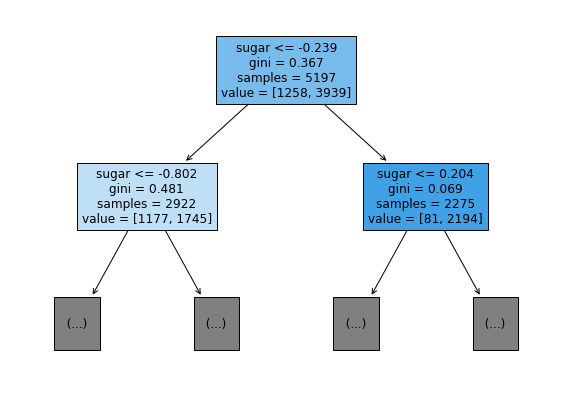

In [11]:
plt.figure(figsize=(10,7))

plot_tree(dt,
         max_depth=1,
         filled=True,
         feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#### 불순도(gini 계수) 중요함
$지니불순도=1-(음성클래스비율^2+양성클래스비율^2)$

- 지니계수의 값은 0~0.5
- 0.5면 최악(클래스가 모두 동일)
- 0이면 순수 노드(하나의 클래스로 분류 됨)
- 가지를 쳤을 때 불순도값이 줄어드는 방향으로 학습

#### 트리모델의 가지치기 방법

> 문제점: 현재처럼 가지치기를 하지 않고 학습하면, 가지가 계속 뻗어나서 일반화된 모델이 안나옴!!!

> 가지치기 방법을 사용하면 과적합되지 않고 일반화 된 모델!

> 가지치기: 자라 날 수  있는 트리의 최대 깊이를 지정


In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


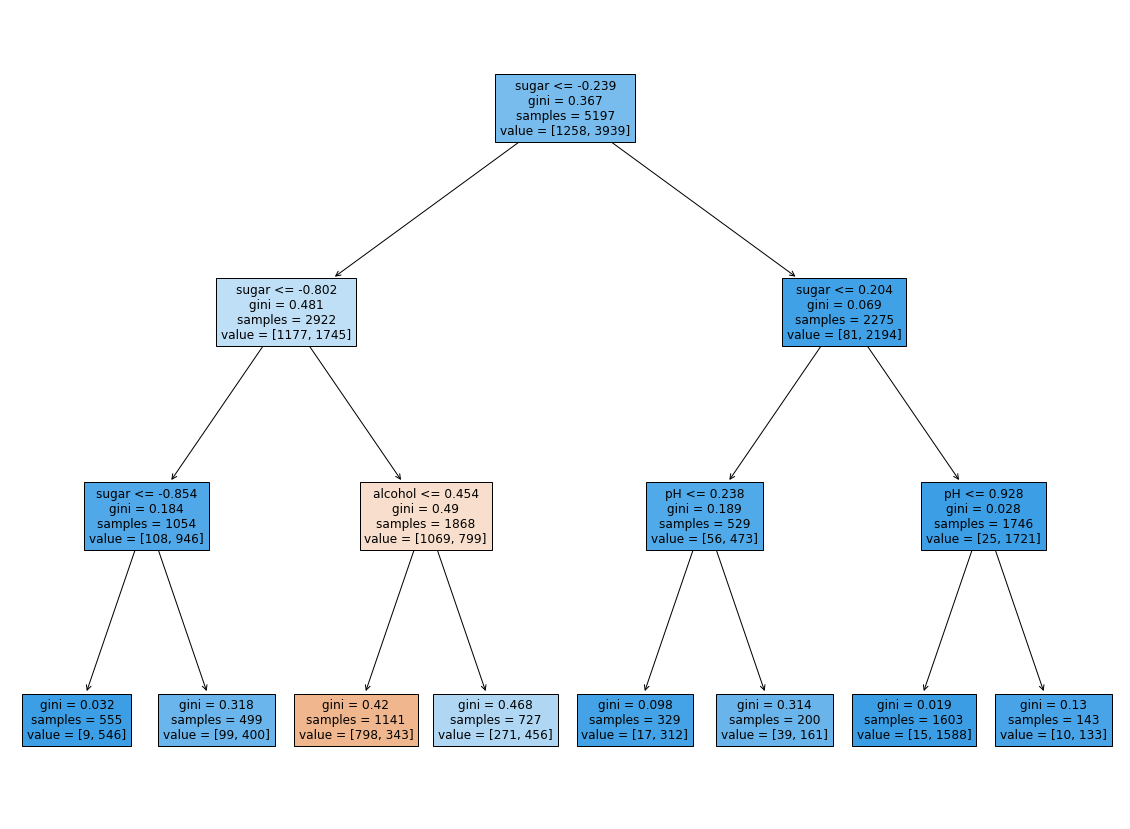

In [13]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [14]:
# 결정 트리 모델은 특징의 정규화 필요 없음
# - 트리 모델은 불순도(gini) 즉 클래스 비율로 계산 

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

# *_scaled: 정규화 된 값
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


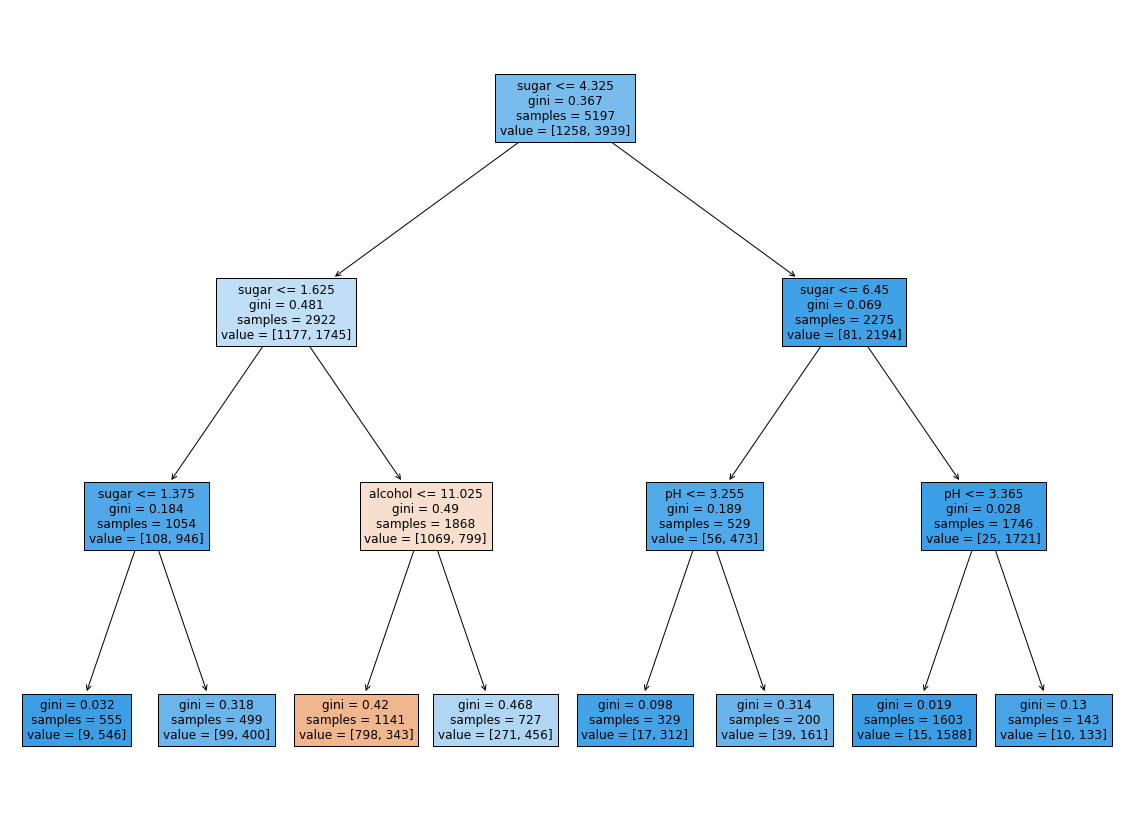

In [15]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#### 트리모델의 단점 
- 과적합으로 알고리즘 성능 저하(트리의 크기를 사전에 제한하는 가지치기 필수!)
- 한번에 하나의 변수만 고려(변수 간 강호작용 파악 어려움)
- 약간의 차이에 따라 트리 모양이 많이 달라짐(두 변수가 비슷한 수준의 정보력, 약간의 차이로 다른 변수가 선택되면 이후의 트리 구성이 크게 달라짐)

> 앙상블 기법: 랜덤 포레스트

#### 5. 검증세트(Valid Set)

기존 방법: Train(8) : Test(2) => 결과
 - Train 결과 / Test 결과 => 과대적합, 과소적합 => 더 나은 성능
 - 문제점: 모델 튜닝(Test 데이터를 활용)
 
 NEW 방법: Train(6) : Valid(2) : Test(2)
 - Train => Train과 Valid로 분리해서 활용
 - Test는 전혀 사용하지 않음(검증에만 활용)

In [16]:
data = wine [['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [17]:
# Train(8) : Test(2)
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [18]:
# Train(8) => Train(6) : Valid(2)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [19]:
print(sub_input.shape, val_input.shape, test_input.shape)

(4157, 3) (1040, 3) (1300, 3)


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


#### 6. 교차 검증(cross validation)

- valid 세트 생성하느라 Train 세트 크기가 줄어듬
- 보통 많은 데이터를 훈련할수록 좋은 모델이 만들어짐
- 그렇다고 검증 세트를 너무 적게 떼면 검증 점수가 들쑥 날쑥

> 교차검증 사용하면 해결 가능!

> 교차검증: Test는 그대로 두고, Train 세트를 3-fold와 같이 나워서 1개 세트를 valid로 사용 방법(보통5-fold. 10-fold 많이 사용)

In [35]:
dt = DecisionTreeClassifier(random_state=42) 
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))

0.996921300750433


In [36]:
from sklearn.model_selection import cross_validate
# default => 5-fold
# fit     => train
# score   => Valid
# test    => Test
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00595951, 0.00600886, 0.00498748, 0.00595737, 0.00499344]), 'score_time': array([0.00099826, 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [26]:
import numpy as np

# 평균점수
print(np.mean(scores['test_score']))

0.855300214703487
